In [1]:
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime
import matplotlib.pyplot as plot
from pandas import DataFrame, Series

# read .xlsx files under ./data directory into datatables.

In [2]:
# read data in .//6-8月数据

datapath=pl.Path("/home/techstar/data/pyprojects/SHDK_828/6-8月数据")
#datapath=pl.Path.cwd()
file_list=[]
DataFrame_list=[]
for x in datapath.glob("*).xlsx"):
    f=pd.ExcelFile(x)
    t=f.parse(f.sheet_names[0])
    DataFrame_list.append(t)
    file_list.append(x.name)
 

In [7]:
# read data in .data_Jun_Aug
datapath=pl.Path("/home/techstar/data/pyprojects/SHDK_828/数据导出/数据导出")
#datapath=pl.Path.cwd()
file_list=[]
DataFrame_list=[]
for x in datapath.glob("*)-H.xlsx"):
    f=pd.ExcelFile(x)
    t=f.parse(f.sheet_names[0])
    DataFrame_list.append(t)
    file_list.append(x.name)

In [8]:
dfs=[]
for x in DataFrame_list:
    df = DataFrame(data = x[2:].values,columns=x.iloc[1])
    df['时间']=df['时间'].apply(lambda y: datetime(y.year,y.month,y.day,y.hour,y.minute,y.second))    
    df= df.set_index("时间")
    dfs.append(df)

In [78]:
datapath=pl.Path("/home/techstar/data/pyprojects/SHDK_828/6-8月数据")

In [81]:
datapath=pl.Path("/home/techstar/data/pyprojects/SHDK_828/数据导出/数据导出")

In [10]:
file_list

['昆米990(35kV正母)(KunYang1)-H.xlsx',
 '江重1304(110kV三段)(jiangchuan2)-H.xlsx',
 '柳民1612(110kV2出线)(ChangLiu4)-H.xlsx',
 '江韩3764(35kV三段)(jiangchuan5)-H.xlsx',
 '钦11新芝(10kV一段)(QinZhou3)-H.xlsx',
 '江轻1301(110kV一段)(jiangchuan1)-H.xlsx',
 '江汽3748江申195(35kV一段)(jiangchuan4)-H.xlsx',
 '江轨1305(110kV二段)(jiangchuan3)-H.xlsx',
 '钦28钦78(10kV二段)(QinZhou4)-H.xlsx',
 '昆5互感器厂(10kV一段)(KunYang3)-H.xlsx']

In [11]:
# write to csv file

import re
for x,y in zip(dfs,file_list):
    rx=re.compile("[A-Za-z]{4,}[0-9]")
    x.to_csv(datapath.joinpath(rx.findall(y)[-1]+"-H.csv"))


In [82]:
# read from csv files

#datapath=pl.Path("./6-8月数据")

file_list=[]
dfs=[]
for x in datapath.glob("*.csv"):
    print("Reading "+x.name)
    f=pd.read_csv(x,index_col=0,na_values=" ")
    dfs.append(f)
    file_list.append(x.name)

Reading jiangchuan1-V.csv
Reading jiangchuan3-V.csv
Reading jiangchuan5-V.csv
Reading QinZhou3-V.csv
Reading jiangchuan2-V.csv
Reading QinZhou4-V.csv
Reading KunYang3-V.csv
Reading KunYang1-V.csv
Reading jiangchuan4-V.csv


In [93]:
# write to csv file
'''
import re
for x,y in zip(dfs,file_list):
    rx=re.compile("[A-Za-z]{4,}[0-9]")
    x.to_csv("./6-8月数据/"+rx.findall(y)[-1]+".csv",index=False)
'''

In [97]:
cols = ["Avg[V 有效值 AB]",
# "Avg[V 总谐波畸变率 A]",
 "Avg[V 负序不平衡 Total]",
 "Avg[V SPOS All]",
 "Avg[V SNEG All]",
 "Avg[V SZERO All]",
#"Pst A",
 "Avg[I 有效值 A]",
 "Avg[I 总谐波畸变率 A]",
 "Avg[I 负序不平衡 Total]",
 "Avg[I SPOS All]",
 "Avg[I SNEG All]",
 "Avg[I ZERO All]",
# "Avg[P A]",
# "Avg[Q A]",
# "Avg[S A]",
# "Avg[功率因数 A]"
 ]

In [82]:
'''
=DataFrame()
tr=DataFrame()
for df in dfs:
    for c in df.columns:
        for col in cols:
            if c.find(col) != -1:
                tr_data[c]=df[c]
            tr=tr.join(tr_data,how="outer")
#            else:
#                print(f_name+" does not have column: "+ col)
'''               

'\n=DataFrame()\ntr=DataFrame()\nfor df in dfs:\n    for c in df.columns:\n        for col in cols:\n            if c.find(col) != -1:\n                tr_data[c]=df[c]\n            tr=tr.join(tr_data,how="outer")\n#            else:\n#                print(f_name+" does not have column: "+ col)\n'

In [98]:
tr_data=DataFrame()
tr=DataFrame()
for df in dfs:
    i=0
    for c in df.columns:
        for col in cols:
            if c.find(col)!=-1:
                print (c)
                i+=1
                tr_data[c]=df[c]
#    tr=tr.join(tr_data)
    print (i)           

 Changliu3 - Avg[V 有效值 AB] (V)
 Changliu3 - Avg[V 负序不平衡 Total] (%)
 Changliu3 - Avg[V SPOS All] (V)
 Changliu3 - Avg[V SNEG All] (V)
 Changliu3 - Avg[V SZERO All] (V)
 Changliu3 - Avg[I 有效值 A] (A)
 Changliu3 - Avg[I 总谐波畸变率 A] (%)
 Changliu3 - Avg[I 负序不平衡 Total] (%)
 Changliu3 - Avg[I SPOS All] (A)
 Changliu3 - Avg[I SNEG All] (A)
 Changliu3 - Avg[I ZERO All] (A)
11
 HaiLu6 - Avg[V 有效值 AB] (V)
 HaiLu6 - Avg[V 负序不平衡 Total] (%)
 HaiLu6 - Avg[V SPOS All] (V)
 HaiLu6 - Avg[V SNEG All] (V)
 HaiLu6 - Avg[V SZERO All] (V)
 HaiLu6 - Avg[I 有效值 A] (A)
 HaiLu6 - Avg[I 总谐波畸变率 A] (%)
 HaiLu6 - Avg[I 负序不平衡 Total] (%)
 HaiLu6 - Avg[I SPOS All] (A)
 HaiLu6 - Avg[I SNEG All] (A)
 HaiLu6 - Avg[I ZERO All] (A)
11
 Changliu2 - Avg[V 有效值 AB] (V)
 Changliu2 - Avg[V 负序不平衡 Total] (%)
 Changliu2 - Avg[V SPOS All] (V)
 Changliu2 - Avg[V SNEG All] (V)
 Changliu2 - Avg[V SZERO All] (V)
 Changliu2 - Avg[I 有效值 A] (A)
 Changliu2 - Avg[I 总谐波畸变率 A] (%)
 Changliu2 - Avg[I 负序不平衡 Total] (%)
 Changliu2 - Avg[I SPOS All] (A

In [99]:
for c in tr_data.columns:
    if (c.find("Changliu4") !=-1) or (c.find("HaiLu5") !=-1):
        tr_data=tr_data.drop(c,axis=1)

In [100]:
tr_data.columns

Index([' Changliu3 - Avg[V 有效值 AB] (V)', ' Changliu3 - Avg[V 负序不平衡 Total] (%)',
       ' Changliu3 - Avg[V SPOS All] (V)', ' Changliu3 - Avg[V SNEG All] (V)',
       ' Changliu3 - Avg[V SZERO All] (V)', ' Changliu3 - Avg[I 有效值 A] (A)',
       ' Changliu3 - Avg[I 总谐波畸变率 A] (%)',
       ' Changliu3 - Avg[I 负序不平衡 Total] (%)',
       ' Changliu3 - Avg[I SPOS All] (A)', ' Changliu3 - Avg[I SNEG All] (A)',
       ...
       ' Changliu1 - Avg[V 负序不平衡 Total] (%)',
       ' Changliu1 - Avg[V SPOS All] (V)', ' Changliu1 - Avg[V SNEG All] (V)',
       ' Changliu1 - Avg[V SZERO All] (V)', ' Changliu1 - Avg[I 有效值 A] (A)',
       ' Changliu1 - Avg[I 总谐波畸变率 A] (%)',
       ' Changliu1 - Avg[I 负序不平衡 Total] (%)',
       ' Changliu1 - Avg[I SPOS All] (A)', ' Changliu1 - Avg[I SNEG All] (A)',
       ' Changliu1 - Avg[I ZERO All] (A)'],
      dtype='object', length=110)

In [102]:
#tr_data.dropna().to_csv('train_data')

In [103]:
train_data=tr_data.dropna()

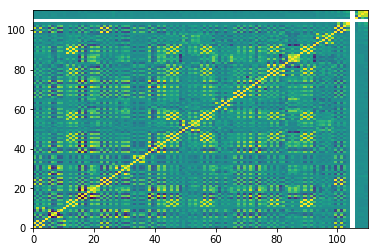

In [104]:
corMat=DataFrame(train_data.corr())
plot.pcolor(corMat)
plot.show()

In [106]:
train_data.iloc[:,-11:]

,Changliu1 - Avg[V 有效值 AB] (V),Changliu1 - Avg[V 负序不平衡 Total] (%),Changliu1 - Avg[V SPOS All] (V),Changliu1 - Avg[V SNEG All] (V),Changliu1 - Avg[V SZERO All] (V),Changliu1 - Avg[I 有效值 A] (A),Changliu1 - Avg[I 总谐波畸变率 A] (%),Changliu1 - Avg[I 负序不平衡 Total] (%),Changliu1 - Avg[I SPOS All] (A),Changliu1 - Avg[I SNEG All] (A),Changliu1 - Avg[I ZERO All] (A)
时间,,,,,,,,,,,
2017-06-08 13:15:00,114404.312500,0.135841,66029.796875,89.694687,55.416889,0.0,0.0,101.366258,0.017594,0.017675,0.018631
2017-06-08 13:30:00,114426.054688,0.066439,66072.593750,43.896896,0.578706,0.0,0.0,102.107775,0.017202,0.017343,0.016954
2017-06-08 14:00:00,114449.304688,0.136025,66047.992188,89.842468,55.593571,0.0,0.0,101.407397,0.017255,0.017302,0.018582
2017-06-08 14:15:00,114546.460938,0.123284,66102.523438,81.494583,55.671864,0.0,0.0,100.599182,0.017594,0.017562,0.018603
2017-06-08 14:30:00,114524.695312,0.127714,66092.750000,84.409065,55.545658,0.0,0.0,101.180661,0.017263,0.017315,0.018457
2017-06-08 14:45:00,114573.679688,0.064559,66162.640625,42.713799,0.169499,0.0,0.0,98.717743,0.017547,0.017136,0.017044
2017-06-08 15:00:00,114551.304688,0.105082,66106.148438,69.466042,55.590973,0.0,0.0,99.846989,0.017565,0.017411,0.018758
2017-06-08 15:15:00,114496.687500,0.120818,66076.562500,79.833397,55.671864,0.0,0.0,98.591673,0.017660,0.017282,0.018588
2017-06-08 15:30:00,114541.507812,0.062739,66144.656250,41.498844,0.169499,0.0,0.0,101.131213,0.017464,0.017556,0.017439


In [2]:
import re

In [5]:
rx=re.compile("[A-Za-z]{4,}[0-9]")

In [9]:
rx.findall(file_list[0])[-1]+".csv"

'ChangLiu4.csv'

In [6]:

dfs[0].columns

Index([' Changliu3 - Min[V 有效值 A] (V)', ' Changliu3 - Avg[V 有效值 A] (V)',
       ' Changliu3 - Max[V 有效值 A] (V)', ' Changliu3 - Min[V 有效值 B] (V)',
       ' Changliu3 - Avg[V 有效值 B] (V)', ' Changliu3 - Max[V 有效值 B] (V)',
       ' Changliu3 - Min[V 有效值 C] (V)', ' Changliu3 - Avg[V 有效值 C] (V)',
       ' Changliu3 - Max[V 有效值 C] (V)', ' Changliu3 - Min[V 有效值 AB] (V)',
       ...
       ' Changliu3 - Max[功率因数 C]', ' Changliu3 - Min[位移功率因数 A]',
       ' Changliu3 - Avg[位移功率因数 A]', ' Changliu3 - Max[位移功率因数 A]',
       ' Changliu3 - Min[位移功率因数 B]', ' Changliu3 - Avg[位移功率因数 B]',
       ' Changliu3 - Max[位移功率因数 B]', ' Changliu3 - Min[位移功率因数 C]',
       ' Changliu3 - Avg[位移功率因数 C]', ' Changliu3 - Max[位移功率因数 C]'],
      dtype='object', length=123)